In [1]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\X\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
%pip install pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\X\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from visualizer.main import Visualizer, Plot
from tests.test3 import Test

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [53]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [54]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [55]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [56]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

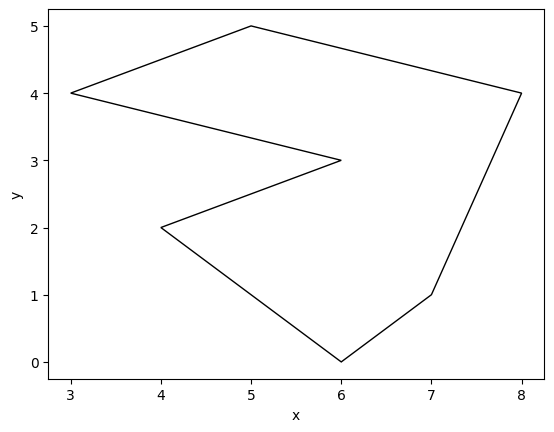

In [58]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [59]:
polygon = [(0, 0), (2, 1), (1, 2), (3, 3), (0, 4), (-1, 2), (-2, 1)]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [60]:
def get_max_index(points):
    min_point = (-float('inf'),-float('inf'))
    indx = 0
    for i,point in enumerate(points):
        if min_point[1] < point[1]:
            indx = i
            min_point = point
    return indx

def get_min_index(points):
    min_point = (float('inf'),float('inf'))
    indx = 0
    for i,point in enumerate(points):
        if min_point[1] > point[1]:
            indx = i
            min_point = point
    return indx


In [61]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    min_index = get_min_index(polygon)
    max_index = get_max_index(polygon)
    # Top to bottom
    i = max_index
    while min_index != i:
        j = (i + 1) % n
        if polygon[i][1] < polygon[j][1]:
            return False
        i = (i + 1) % n
    i = min_index
    while max_index != i:
        j = (i + 1) % n
        if polygon[i][1] > polygon[j][1]:
            return False
        i = (i + 1) % n 
    return True

Przeprowadź test poprawności powyższej funkcji.

In [62]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [63]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

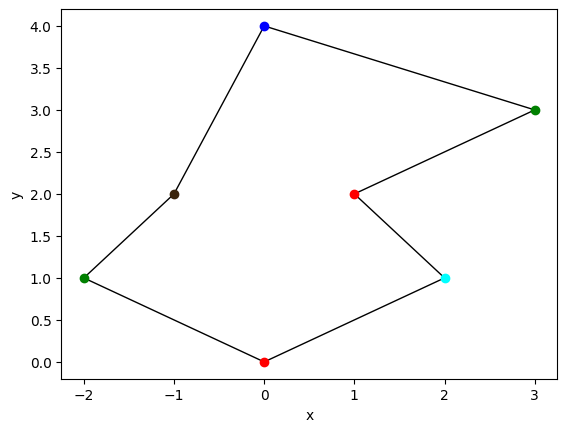

In [64]:
draw_polygon_colors(polygon,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [65]:
def below(first, second):
    return first[1] < second[1]
def above(first, second):
    return first[1] > second[1]
def angle(a,b,c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

In [66]:
E = 1e-18
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    color = [ 4 for _ in range(n) ]
    for current_i, current_point in enumerate(polygon):
        previous_i = (current_i-1+n)%n
        next_i = (current_i+1)%n
        previous_point = polygon[previous_i]
        next_point = polygon[next_i]
        if angle(previous_point,current_point,next_point) > E:
            if below(current_point,previous_point) and below(current_point,next_point):
                color[current_i] = 1
            elif above(current_point,previous_point) and above(current_point,next_point):
                color[current_i] = 0
        elif angle(previous_point,current_point,next_point) < -E:
            if below(current_point,previous_point) and below(current_point,next_point):
                color[current_i] = 2
            elif above(current_point,previous_point) and above(current_point,next_point):
                color[current_i] = 3
        else:
            color[current_i] = 4
    return color

Przeprowadź test poprawności powyższej funkcji. 

In [67]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s



Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

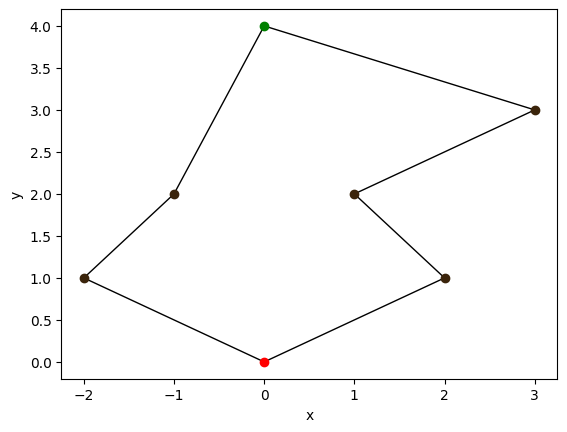

In [68]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

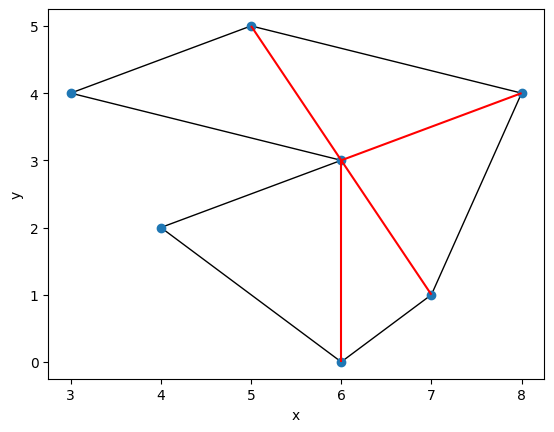

In [69]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [70]:
 

def triangulation_t(polygon):
    triangulation_result = []
    left_right = divide(polygon)
    events = build_events(polygon)
    
    return triangulation_result
    raise Exception("Unimplemented")

In [71]:
def previous_p(index, n):
    return (index + n - 1) % n

def next_p(index, n):
    return (index + 1) % n

def get_max_index(points):
    # Find the index of the vertex with the maximum y-coordinate
    max_point = (-float('inf'), -float('inf'))
    indx = 0
    for i, point in enumerate(points):
        if point[1] > max_point[1]:
            indx = i
            max_point = point
    return indx

def get_min_index(points):
    # Find the index of the vertex with the minimum y-coordinate
    min_point = (float('inf'), float('inf'))
    indx = 0
    for i, point in enumerate(points):
        if point[1] < min_point[1]:
            indx = i
            min_point = point
    return indx

def build_events(polygon):
    # Create a list of vertices sorted by y-coordinate (monotonic direction)
    return sorted(range(len(polygon)), key=lambda i: (-polygon[i][1], polygon[i][0]))

def divide(polygon):
    n = len(polygon)
    left_right = [0 for _ in range(n)]
    min_index = get_min_index(polygon)
    max_index = get_max_index(polygon)

    # Assign chain type (0 for left, 1 for right)
    i = max_index
    while i != min_index:
        left_right[i] = 0  # Left chain
        i = next_p(i, n)

    i = min_index
    while i != max_index:
        left_right[i] = 1  # Right chain
        i = next_p(i, n)

    return left_right

def triangulation(polygon):
    triangulation_result = []
    left_right = divide(polygon)  # Determine left/right chain
    events = build_events(polygon)  # Events sorted by y-coordinate
    stack = []

    for event in events:
        if len(stack) < 2:
            # Push the first two vertices to the stack
            stack.append(event)
        else:
            current_chain = left_right[event]
            if left_right[stack[-1]] != current_chain:
                # Opposite chain: connect to all vertices in the stack
                while len(stack) > 1:
                    top = stack.pop()
                    triangulation_result.append((event, top))
                # Keep the last vertex on the stack
                last = stack.pop()
                stack.append(last)  # Add the last one back
                stack.append(event)  # Add the current vertex
            else:
                # Same chain: add valid diagonals
                while len(stack) > 1:
                    top = stack.pop()
                    next_top = stack[-1]
                    # Add diagonal
                    triangulation_result.append((event, next_top))
                    # Check convexity, if required
                # Leave the top vertex
                stack.append(top)
                stack.append(event)

    # Add final diagonals
    while len(stack) > 2:
        top = stack.pop()
        triangulation_result.append((stack[-1], top))

    return triangulation_result


In [ ]:
def previous_p(index, n):
    return (index + n - 1) % n

def next_p(index, n):
    return (index + 1) % n

def get_max_index(points):
    return max(range(len(points)), key=lambda i: (points[i][1], -points[i][0]))

def get_min_index(points):
    return min(range(len(points)), key=lambda i: (points[i][1], points[i][0]))

def divide(polygon):
    n = len(polygon)
    left_right = [0] * n
    min_index = get_min_index(polygon)
    max_index = get_max_index(polygon)

    # Mark left chain
    i = max_index
    while i != min_index:
        left_right[i] = 0  # Left chain
        i = next_p(i, n)

    # Mark right chain
    i = min_index
    while i != max_index:
        left_right[i] = 1  # Right chain
        i = next_p(i, n)

    return left_right

def build_events(polygon):
    return sorted(range(len(polygon)), key=lambda i: (-polygon[i][1], polygon[i][0]))

def triangulation_x(polygon):
    """
    Perform triangulation of a monotone polygon.
    :param polygon: List of vertices (x, y) in counter-clockwise order.
    :return: List of diagonals [(i, j), ...], where i, j are vertex indices.
    """
    if not is_y_monotonic(polygon):
        return []
    n = len(polygon)
    colors = color_vertex(polygon)
    triangulation_result = []
    left_right = divide(polygon)  # Determine left/right chains
    events = build_events(polygon)  # Sorted vertices by y-coordinate
    stack = []

    for i, event in enumerate(events):

        if left_right[i] != left_right[stack[-1]]:
            for k in range(len(stack)-1,0,-1):
                triangulation_result.append()
            
        current_chain = left_right[event]
        if left_right[stack[-1]] != current_chain:
            # Opposite chain: connect diagonals to all stack vertices
            while len(stack) > 1:
                top = stack.pop()
                triangulation_result.append((event, top))
            stack.pop()  # Remove the last vertex
            stack.append(events[i - 1])  # Push the previous event
            stack.append(event)
        else:
            # Same chain: check convexity and add diagonals
            while len(stack) > 1:
                top = stack.pop()
                next_top = stack[-1]
                # Add a diagonal
                triangulation_result.append((event, next_top))
            stack.append(top)  # Restore the last vertex
            stack.append(event)

    # Final diagonals from remaining stack
    while len(stack) > 2:
        top = stack.pop()
        triangulation_result.append((stack[-1], top))

    return triangulation_result


In [ ]:
import enum
class Point:
    def __init__(self, pos, side, classification):
        self.pos = pos
        self.side = side
        self.classification = classification

    def __gt__(self, other):
        return self.pos[1] > other.pos[1] or (self.pos[1] == other.pos[1] and self.pos[0] < other.pos[0])

class Point_side(enum.Enum):
    left = 1
    right = 2
    both = 3
class Point_type(enum.Enum):
    start = 1
    end = 2
    joining = 3
    dividing = 4
    regular = 5

def prepare_Points(points_series, side, classification):
    return [Point(points_series[i], side[i], classification[i]) for i in range(len(points_series))]


def check_if_inside(a, b, c, epsilon=1e-14):
    """Check if point c is inside the triangle formed by a and b."""
    d = det(a.pos, b.pos, c.pos)  # Determinant to check convexity
    if c.side == Point_side.left:
        return d < -epsilon
    return d > epsilon


def sides_equal(a, b):
    """Check if two points are on the same chain."""
    if a.side == Point_side.both or b.side == Point_side.both:
        return True
    return a.side == b.side


def mark_sides(points_series, classification):
    """Mark points as belonging to the left or right chain."""
    side = [Point_side.right for _ in range(len(points_series))]
    a = 0
    while a < len(points_series) and classification[a] != Point_type.start:
        a += 1
    side[a] = Point_side.both
    a += 1
    while classification[a % len(points_series)] != Point_type.end:
        side[a % len(points_series)] = Point_side.left
        a += 1
    side[a % len(points_series)] = Point_side.both
    return side


def put_triangle(result, a, b, c, lines, points, visualiser=None):
    """Add a triangle to the result."""
    t = [a.pos, b.pos, c.pos]
    result.append(t)
    if visualiser is not None:
        visualiser.put_triangle(lines, points, result, t)


def triangulation(lines, visualiser=None):
    """
    Perform monotone polygon triangulation.

    Args:
        lines: The polygon represented as a list of edges.
        visualiser: Optional visualiser for step-by-step visualization.

    Returns:
        A list of triangles, where each triangle is represented as a list of three points.
    """
    points_series = lines_to_points_series(lines)
    classification =  color_vertex(lines)

    if visualiser is not None:
        visualiser.put_scene(lines)

    # Check if the polygon is monotone
    if not is_y_monotonic(lines, classification):
        return []

    side = mark_sides(points_series, classification)
    points = sorted(prepare_Points(points_series, side, classification))

    stack = [points[0], points[1]]
    i = 2
    res = []

    while i < len(points):
        if not sides_equal(stack[-1], points[i]):
            # Opposite chains: connect to all vertices in the stack
            for k in range(len(stack) - 1, 0, -1):
                put_triangle(res, stack[k], stack[k - 1], points[i], lines, points_series, visualiser)
            stack = [stack[-1], points[i]]
        else:
            # Same chain: process stack to form valid triangles
            new_stack = []
            while len(stack) >= 2:
                if check_if_inside(stack[-2], stack[-1], points[i]):
                    put_triangle(res, stack[-2], stack[-1], points[i], lines, points_series, visualiser)
                    stack.pop()
                else:
                    new_stack.append(stack.pop())
            new_stack.append(stack.pop())
            new_stack.reverse()
            new_stack.append(points[i])
            stack = new_stack

        i += 1

    if visualiser is not None:
        visualiser.put_triangulation(lines, points_series, res)

    return res


In [ ]:
def triangulate_polygon(polygon):
    n = len(polygon)
    triangulation_result = []
    
    # The vertex with the largest y-coordinate is the starting point
    max_index = get_max_index(polygon)
    
    # Assumes that the polygon is y-monotonic
    events = build_table(polygon, max_index)
    
    stack = [0, 1]
    
    while len(stack) != 0:
        next_v_i = next_p(stack[-1], len(stack))
        next_v = events[next_v_i]
        
        if right[next_v] != right[events[stack[-1]]]:
            for s in stack:
                v_1 = events[s]
                triangulation_result.append((v_1, next_v))
            stack = [stack[-2], stack[-1]]
        else:
            # Additional logic for processing the same side of the polygon
            pass
    
    # Unused code for handling states and helpers (commented out)
    # states = []
    # helpers = {}
    # for i in range(len(events)):
    #     v = events[i]
    #     if colors[v] == 0:
    #         e_l = (previous_p(v), v)
    #         states.append(e_l)
    #         helpers[e_l] = i
    #     elif colors[v] == 1:
    #         e_l = (previous_p(v), v)
    #         v_h = helpers[e_l]
    #         if colors[v_h] == 2:
    #             triangulation_result.append((v, v_h))
    #             # Delete e_l from states and helpers[e_l]
    #     elif colors[v] == 4:
    #         if right(polygon[previous_p(v)], polygon[v], polygon[next_p(v)]):
    #             e_g = (v, previous_p(v, n))
    #             e_d = (v, next_p(v, n))
    #             if helpers[e_g] == 2:
    #                 triangulation_result.append((helpers[e_g], v))
    #                 # Delete e_g from states
    #                 states.append(e_d)
    #                 helpers[e_d] = v
    #             else:
    #                 pass  # Additional handling goes here

    return triangulation_result


('    return triangulation_result\n',)

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ:

Można do tego używać tablicy krotek. Dla triangulacji należy przechowywać 2 indeksy punktów, które są znalezioną przekątną

Przeprowadź testy poprawności powyższej funkcji.


In [77]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: WRONG ANSWER
		Output:   [(3, 1), (4, 2), (4, 1), (5, 2), (5, 1), (0, 5), (0, 2)]
		Expected: [[0, 2], [0, 4], [0, 3]]
	Test 2: WRONG ANSWER
		Output:   [(7, 1), (2, 7), (6, 2), (3, 6), (5, 3), (4, 3), (5, 4)]
		Expected: [[1, 7], [2, 7], [2, 6], [3, 6], [3, 5]]
	Test 3: WRONG ANSWER
		Output:   [(1, 17), (16, 1), (2, 16), (15, 2), (3, 15), (14, 3), (4, 14), (13, 4), (5, 13), (12, 5), (6, 12), (11, 6), (7, 11), (8, 11), (10, 8), (10, 7), (9, 8), (10, 9)]
		Expected: [[1, 17], [16, 1], [16, 2], [2, 15], [3, 15], [3, 14], [4, 14], [13, 4], [5, 13], [12, 5], [6, 12], [11, 6], [7, 11], [8, 11], [10, 8]]
	Test 4: WRONG ANSWER
		Output:   [(3, 5), (6, 3), (6, 4), (2, 6), (1, 6), (7, 1), (7, 2), (0, 7), (8, 0), (9, 8)]
		Expected: [[3, 5], [3, 6], [2, 6], [1, 6], [7, 1], [0, 7], [8, 0]]
	Test 5: WRONG ANSWER
		Output:   [(1, 5), (4, 1), (2, 4), (3, 2)]
		Expected: [[1, 5], [4, 1], [2, 4]]
	Test 6: WRONG ANSWER
		Output:   [(5, 7), (4, 6), (4, 7), (3, 6), (3, 7), (2, 6)

Zwizualizuj powstały wielokąt podzielony na trójkąty.

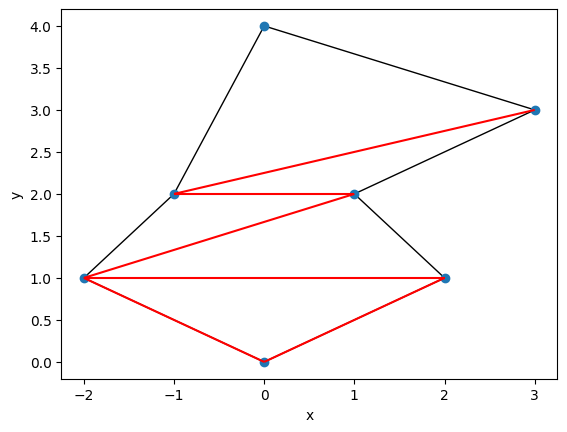

In [75]:
tri = triangulation(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [82]:
visualizer = Visualizer()
plot = Plot(visualizer.get_scenes())
plot.draw()

AttributeError: 'Visualizer' object has no attribute 'get_scenes'